In [1]:
import numpy as np
import pandas as pd

In [2]:
#load dataset

data= pd.read_csv('Dataset-Mental-Disorders.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [5]:
data.shape

(120, 19)

In [6]:
data.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-78,Sometimes,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Depression
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [7]:
#checking null values

data.isna().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [8]:
#checking duplicate values

data.duplicated().sum()

0

In [9]:
data.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [10]:
#replacing specfic column entity with something else

data.replace({'YES': 1, 'NO': 0}, inplace=True)

In [12]:
#droping uncessary columns and fiting the model

x = data.drop(columns=['Patient Number', 'Expert Diagnose'])
print("Shape of x:", x.shape)

Shape of x: (120, 17)


In [14]:
y = data['Expert Diagnose']
print("Shape of y:", y.shape)

Shape of y: (120,)


In [15]:
y

0      Bipolar Type-2
1          Depression
2      Bipolar Type-1
3      Bipolar Type-2
4              Normal
            ...      
115        Depression
116    Bipolar Type-1
117    Bipolar Type-2
118        Depression
119            Normal
Name: Expert Diagnose, Length: 120, dtype: object

In [16]:
x

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,Usually,Seldom,Sometimes,Sometimes,1,YES,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2 From 10,5 From 10,3 From 10
116,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6 From 10,7 From 10,8 From 10
117,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1 From 10,5 From 10,3 From 10
118,Usually,Sometimes,Seldom,Seldom,0,1,1,0,1,1,1,0,1,1,7 From 10,7 From 10,7 From 10


In [17]:
#converting object columns into int columns

obj_columns = x.select_dtypes(include=['object']).columns

In [18]:
for col in obj_columns:
    x[col] = x[col].astype('category').cat.codes

In [20]:
x

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,6,6,6


In [21]:
#Splitting Data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (84, 17)
Shape of x_test: (36, 17)
Shape of y_train: (84,)
Shape of y_test: (36,)


In [22]:
#naive_bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [23]:
B=BernoulliNB()

In [24]:
B.fit(x_train,y_train)

BernoulliNB()

In [25]:
B.score(x_train,y_train)

0.8690476190476191

In [26]:
y_pred=B.predict(x_test)

In [52]:
#accuracy
B_accuracy=(accuracy_score(y_test,y_pred))
print(B_accuracy)

0.75


In [28]:
# Decision_Tree classifier

from sklearn.tree import DecisionTreeClassifier

In [29]:
dt=DecisionTreeClassifier()

In [30]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
dt.score(x_train,y_train)

1.0

In [32]:
ypredDT= dt.predict(x_test)

In [51]:
# accuracy
dt_accuracy=(accuracy_score(y_test,ypredDT))
print(dt_accuracy)

0.7777777777777778


In [34]:
print(classification_report(y_test,ypredDT))

                precision    recall  f1-score   support

Bipolar Type-1       0.60      0.86      0.71         7
Bipolar Type-2       1.00      0.86      0.92         7
    Depression       0.78      0.78      0.78         9
        Normal       0.82      0.69      0.75        13

      accuracy                           0.78        36
     macro avg       0.80      0.80      0.79        36
  weighted avg       0.80      0.78      0.78        36



In [35]:
# SVM classifier

from sklearn.svm import SVC

In [36]:
svm = SVC()

In [37]:
svm.fit(x_train, y_train)

SVC()

In [38]:
svm_pred = svm.predict(x_test)

In [39]:
svm.score(x_train,y_train)

0.8571428571428571

In [50]:
#accuracy
svm_accuracy=(accuracy_score(y_test, svm_pred))
print(svm_accuracy)

0.6944444444444444


In [41]:
# KNN classifier

from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
knn_pred = knn.predict(x_test)

In [47]:
knn.score(x_train,y_train)

0.8214285714285714

In [48]:
# accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

0.4444444444444444


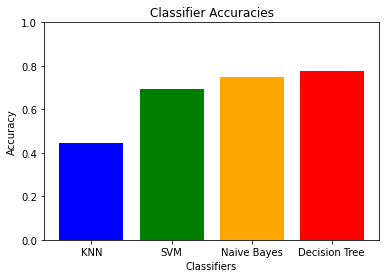

In [53]:
# visualization of accuracies of all classifier in one plot
import matplotlib.pyplot as plt

# Create a bar plot for accuracy
classifiers = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree']
accuracies = [knn_accuracy, svm_accuracy, B_accuracy, dt_accuracy]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Classifier Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


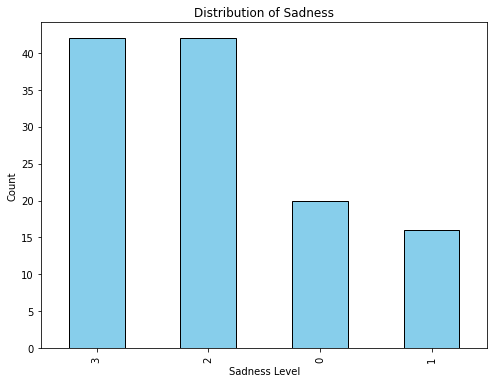

In [57]:
# Bar plot for "Sadness"

plt.figure(figsize=(8, 6))
x['Sadness'].value_counts().plot(kind='bar', color='skyblue' ,edgecolor='black')
plt.title('Distribution of Sadness')
plt.xlabel('Sadness Level')
plt.ylabel('Count')
plt.show()

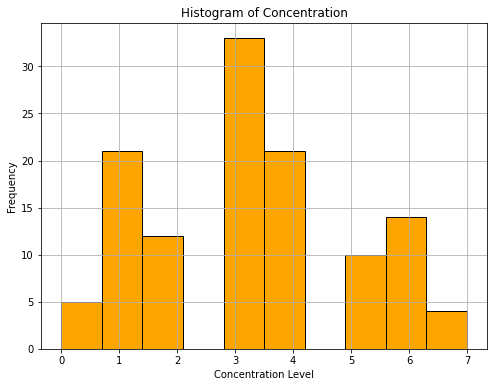

In [58]:
# Histogram for "Concentration"

plt.figure(figsize=(8, 6))
plt.hist(x['Concentration'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Concentration')
plt.xlabel('Concentration Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

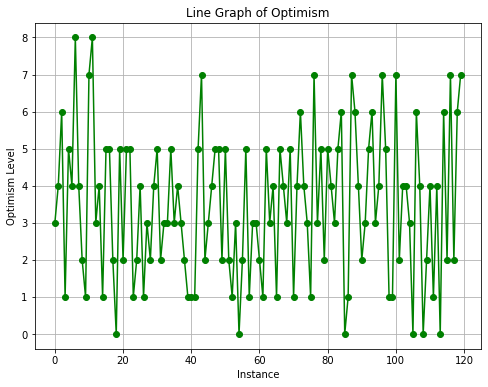

In [59]:
# Line graph for "Optimism"
plt.figure(figsize=(8, 6))
plt.plot(x.index, x['Optimisim'], marker='o', color='green', linestyle='-')
plt.title('Line Graph of Optimism')
plt.xlabel('Instance')
plt.ylabel('Optimism Level')
plt.grid(True)
plt.show()

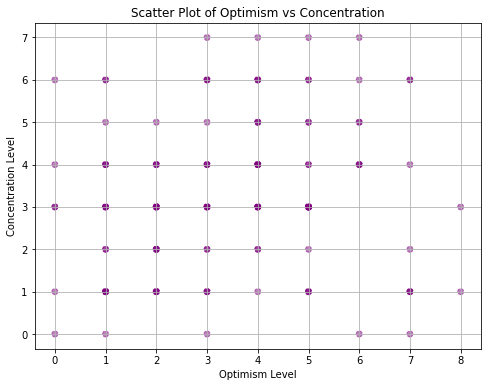

In [63]:
# Scatter plot between "Optimism" and "Concentration"
plt.figure(figsize=(8, 6))
plt.scatter(x['Optimisim'], x['Concentration'], color='purple', alpha=0.5,)
plt.title('Scatter Plot of Optimism vs Concentration')
plt.xlabel('Optimism Level')
plt.ylabel('Concentration Level')
plt.grid(True)
plt.show()

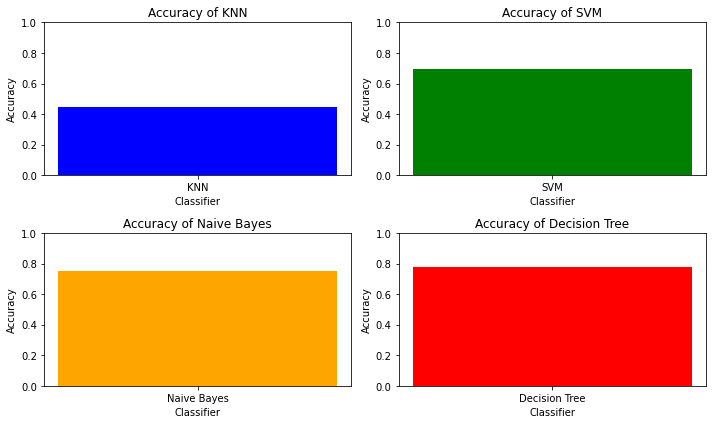

In [71]:
# visiualization of accuracies of classifiers seperately

import matplotlib.pyplot as plt

# Accuracy scores of classifiers
classifiers = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree']
accuracies = [knn_accuracy, svm_accuracy, B_accuracy, dt_accuracy]

# Create separate bar plots for each classifier
plt.figure(figsize=(10, 6))

# Bar plot for KNN
plt.subplot(221)
plt.bar('KNN', knn_accuracy, color='blue')
plt.title('Accuracy of KNN')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Bar plot for SVM
plt.subplot(222)
plt.bar('SVM', svm_accuracy, color='green')
plt.title('Accuracy of SVM')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Bar plot for Naive Bayes
plt.subplot(223)
plt.bar('Naive Bayes', B_accuracy, color='orange')
plt.title('Accuracy of Naive Bayes')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Bar plot for Decision Tree
plt.subplot(224)
plt.bar('Decision Tree', dt_accuracy, color='red')
plt.title('Accuracy of Decision Tree')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
